In [1]:
import os
from matplotlib import pyplot as plt
from pylab import rcParams
import matplotlib.gridspec as gridspec
import seaborn as sns
from collections import defaultdict
sns.set(style='ticks', palette='Set2')
dt = 0.001

def smooth(x,window_len=11,window='hanning'):
        if x.ndim != 1:
                raise ValueError, "smooth only accepts 1 dimension arrays."
        if x.size < window_len:
                raise ValueError, "Input vector needs to be bigger than window size."
        if window_len<3:
                return x
        if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
                raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"
        s=numpy.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]
        if window == 'flat': #moving average
                w=numpy.ones(window_len,'d')
        else:  
                w=eval('numpy.'+window+'(window_len)')
        y=numpy.convolve(w/w.sum(),s,mode='same')
        return y[window_len:-window_len+1]

rcParams['figure.figsize'] = 17, 8
orig_values = {x: v for x, v in rcParams.iteritems() if 'size' in x}
rcParams.update({'font.size': 12, 
                 'legend.fontsize': 16, 
                 'axes.titlesize': 16,
                 'axes.labelsize': 16,
                 'xtick.labelsize': 12, 
                 'ytick.labelsize': 12,
                 })
res2color = {
    0.00001: 0,
    0.00002: 1,
    0.00003: 2,
    0.00004: 3,
    0.00005: 4,
    0.00006: 19,
    0.00008: 5,
    0.00009: 15,
    0.0001: 6,
    0.0002: 7,
    0.0003: 8,
    0.0004: 9,
    0.0005: 10,
    0.0007: 17,
    0.0008: 11,
    0.0009: 16,
    0.001: 12,
    0.002: 14,
    'aa': 13
    }

plot_colors = np.array([
    (197,27,125),
    (31, 120, 180),
    (178, 223, 138),
    (51, 160, 44),
    (251, 154, 153),
    (227, 26, 28),  # 5
    (253, 191, 111),
    (255, 127, 0),
    (202, 178, 214),
    (106, 61, 154),
    (166,86,40), # 10
    (177, 89, 40), ## color palet 
    (57, 106, 177), 
    (118,42,131), # 13
    (104, 37, 41), 
    (83, 81, 84), 
    (107, 76, 154),
    (146, 36, 40),
    (148, 139, 61),
    (137, 61, 57),
    ]) / 255.0
fonttitle=26
fontother=22

res_cols = {'Ekin': 3,
 'T': 2,
 'angle_252': 12,
 'angle_252_cross': 11,
 'angle_253_cross': 10,
 'bond_124': 9,
 'bond_124_cross': 8,
 'bond_125_cross': 7,
 'dihedral_190': 14,
 'dihedral_190_cross': 13,
 'dihedral_191_cross': 15,
 'lj': 5,
 'lj-14_0': 17,
 'lj-14_1': 16,
 'lj-14_1_cross': 18,
 'lj-tab': 6,
 'res': 4,
 'step': 0,
 'time': 1,
 'Epot': (5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18),
 'bonds': (7, 8, 9),
 'angles': (10, 11, 12),
 'dihedrals': (13, 14, 15),
 'lj-14': (16, 17, 18)}

ref_cols = {'Ekin': 3,
 'P': 10,
 'T': 2,
 'angle_252': 6,
 'bond_124': 5,
 'dihedral_190': 7,
 'lj': 4,
 'lj-14_0': 8,
 'lj-14_1': 9,
 'step': 0,
 'time': 1,
 'Epot': (4, 5, 6, 7, 8, 9)}

In [4]:
raw_data = {f: np.loadtxt(os.path.join('gamma_data', f), skiprows=1) for f in os.listdir('gamma_data/')}

In [6]:
raw_data.keys()

['sim0_10_10.0_12345_4e-05energy_4e-05_12345.csv',
 'sim0_20_20.0_12345_2e-05energy_2e-05_12345.csv',
 'sim0_5_5.0_12345_2e-05energy_2e-05_12345.csv',
 'sim0_20_20.0_12345_1e-05energy_1e-05_12345.csv',
 'sim0_10_10.0_12345_5e-05energy_5e-05_12345.csv',
 'sim0_5_5.0_12345_4e-05energy_4e-05_12345.csv',
 'sim0_10_10.0_12345_3e-05energy_3e-05_12345.csv',
 'sim0_20_20.0_12345_3e-05energy_3e-05_12345.csv',
 'sim0_5_5.0_12345_1e-05energy_1e-05_12345.csv',
 'sim0_5_5.0_12345_3e-05energy_3e-05_12345.csv',
 'sim0_10_10.0_12345_2e-05energy_2e-05_12345.csv',
 'sim0_20_20.0_12345_5e-05energy_5e-05_12345.csv',
 'sim0_5_5.0_12345_5e-05energy_5e-05_12345.csv',
 'sim0_20_20.0_12345_4e-05energy_4e-05_12345.csv',
 'sim0_10_10.0_12345_1e-05energy_1e-05_12345.csv']

In [9]:
gamma_data = {10: {}, 20: {}, 5: {}}
for f in raw_data:
    t = f.split('_')
    g = int(t[1])
    r = float(t[5])
    gamma_data[g][r] = raw_data[f]

In [21]:
sorted(gamma_data)

[5, 10, 20]

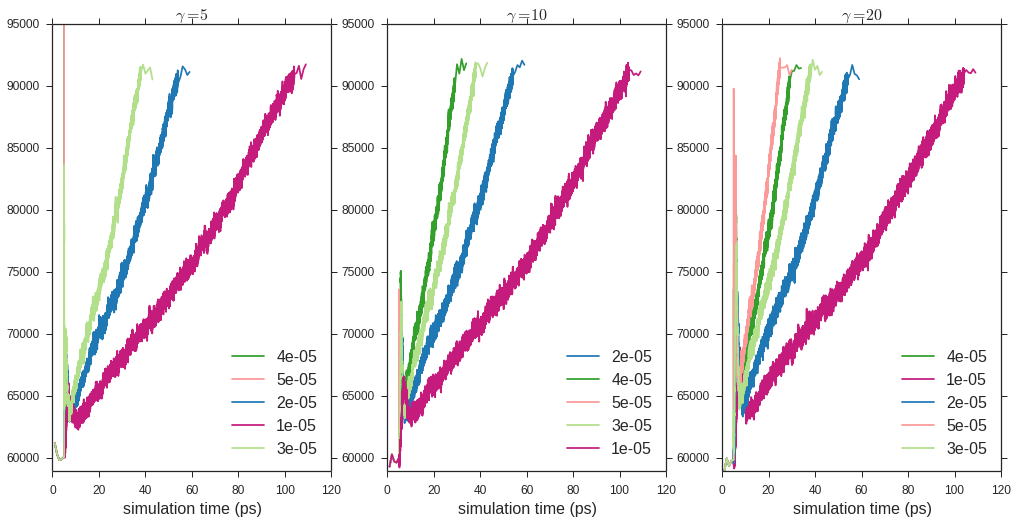

In [29]:
p_idx = 1
for g in sorted(gamma_data):
    plt.subplot(1, 3, p_idx)
    plt.title(r'$\gamma = {}$'.format(g))
    plt.xlabel('simulation time (ps)')
    plt.ylim([59000, 95000])    
    for r in gamma_data[g]:
        val = np.sum(gamma_data[g][r][:, res_cols['Epot']], axis=1)
        plt.plot(gamma_data[g][r][:, 1], val, label=r, color=plot_colors[res2color[r]])
    plt.legend(loc=0)
    p_idx += 1